# FLIGHT DELAYS PREDICTION

## Import Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## LOADING DATASET

In [2]:
data=pd.read_csv("C:\\Users\\niran\\Downloads\\Airlines.csv\\Airlines.csv")

In [3]:
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [4]:
data.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [5]:
data.tail()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1
539382,539383,US,1442,LAX,PHL,5,1439,301,1


In [6]:
data.sample()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
479872,479873,DL,1761,PHL,ATL,2,915,145,1


In [7]:
data.shape

(539383, 9)

## converting data

In [8]:
#converting data categorical to numeric
label_encoder = LabelEncoder()
data['Airline_encoded'] = label_encoder.fit_transform(data['Airline'])
data['AirportFrom_encoded'] = label_encoder.fit_transform(data['AirportFrom'])
data['AirportTo_encoded'] = label_encoder.fit_transform(data['AirportTo'])

In [9]:
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline_encoded,AirportFrom_encoded,AirportTo_encoded
0,1,CO,269,SFO,IAH,3,15,205,1,4,253,135
1,2,US,1558,PHX,CLT,3,15,222,1,14,217,60
2,3,AA,2400,LAX,DFW,3,20,165,1,1,154,80
3,4,AA,2466,SFO,DFW,3,20,195,1,1,253,80
4,5,AS,108,ANC,SEA,3,30,202,0,2,14,252
...,...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,4,203,264
539379,539380,FL,398,SEA,ATL,5,1439,305,0,8,252,16
539380,539381,FL,609,SFO,MKE,5,1439,255,0,8,253,184
539381,539382,UA,78,HNL,SFO,5,1439,313,1,13,128,253


In [10]:
#droping columns
sel=data[["id","Airline_encoded","Flight","AirportFrom_encoded","AirportTo_encoded","DayOfWeek","Time","Length","Delay"]]
print(sel)

            id  Airline_encoded  Flight  AirportFrom_encoded  \
0            1                4     269                  253   
1            2               14    1558                  217   
2            3                1    2400                  154   
3            4                1    2466                  253   
4            5                2     108                   14   
...        ...              ...     ...                  ...   
539378  539379                4     178                  203   
539379  539380                8     398                  252   
539380  539381                8     609                  253   
539381  539382               13      78                  128   
539382  539383               14    1442                  154   

        AirportTo_encoded  DayOfWeek  Time  Length  Delay  
0                     135          3    15     205      1  
1                      60          3    15     222      1  
2                      80          3    20     165 

In [11]:
sel.head()

,id,Airline_encoded,Flight,AirportFrom_encoded,AirportTo_encoded,DayOfWeek,Time,Length,Delay
0,1,4,269,253,135,3,15,205,1
1,2,14,1558,217,60,3,15,222,1
2,3,1,2400,154,80,3,20,165,1
3,4,1,2466,253,80,3,20,195,1
4,5,2,108,14,252,3,30,202,0


In [12]:
sel.tail()

,id,Airline_encoded,Flight,AirportFrom_encoded,AirportTo_encoded,DayOfWeek,Time,Length,Delay
539378,539379,4,178,203,264,5,1439,326,0
539379,539380,8,398,252,16,5,1439,305,0
539380,539381,8,609,253,184,5,1439,255,0
539381,539382,13,78,128,253,5,1439,313,1
539382,539383,14,1442,154,216,5,1439,301,1


## Data Preprocessing

In [13]:
sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   id                   539383 non-null  int64
 1   Airline_encoded      539383 non-null  int32
 2   Flight               539383 non-null  int64
 3   AirportFrom_encoded  539383 non-null  int32
 4   AirportTo_encoded    539383 non-null  int32
 5   DayOfWeek            539383 non-null  int64
 6   Time                 539383 non-null  int64
 7   Length               539383 non-null  int64
 8   Delay                539383 non-null  int64
dtypes: int32(3), int64(6)
memory usage: 30.9 MB


In [14]:
sel.isna().sum()

id                     0
Airline_encoded        0
Flight                 0
AirportFrom_encoded    0
AirportTo_encoded      0
DayOfWeek              0
Time                   0
Length                 0
Delay                  0
dtype: int64

In [15]:
sel.isnull

<bound method DataFrame.isnull of             id  Airline_encoded  Flight  AirportFrom_encoded  \
0            1                4     269                  253   
1            2               14    1558                  217   
2            3                1    2400                  154   
3            4                1    2466                  253   
4            5                2     108                   14   
...        ...              ...     ...                  ...   
539378  539379                4     178                  203   
539379  539380                8     398                  252   
539380  539381                8     609                  253   
539381  539382               13      78                  128   
539382  539383               14    1442                  154   

        AirportTo_encoded  DayOfWeek  Time  Length  Delay  
0                     135          3    15     205      1  
1                      60          3    15     222      1  
2                

In [16]:
sel.duplicated().sum()

0

In [17]:
# If duplicates exist remove duplicate values
sel=sel.drop_duplicates()

In [18]:
# statistical summary 
sel.describe()

,id,Airline_encoded,Flight,AirportFrom_encoded,AirportTo_encoded,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,9.334527,2427.928630,144.116322,144.143162,3.929668,802.728963,132.202007,0.445442
std,155706.604461,5.306368,2067.429837,79.379776,79.353137,1.914664,278.045911,70.117016,0.497015
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,5.000000,712.000000,79.000000,79.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,10.000000,1809.000000,153.000000,153.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,15.000000,3745.000000,208.000000,208.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,17.000000,7814.000000,292.000000,292.000000,7.000000,1439.000000,655.000000,1.000000


# EDA

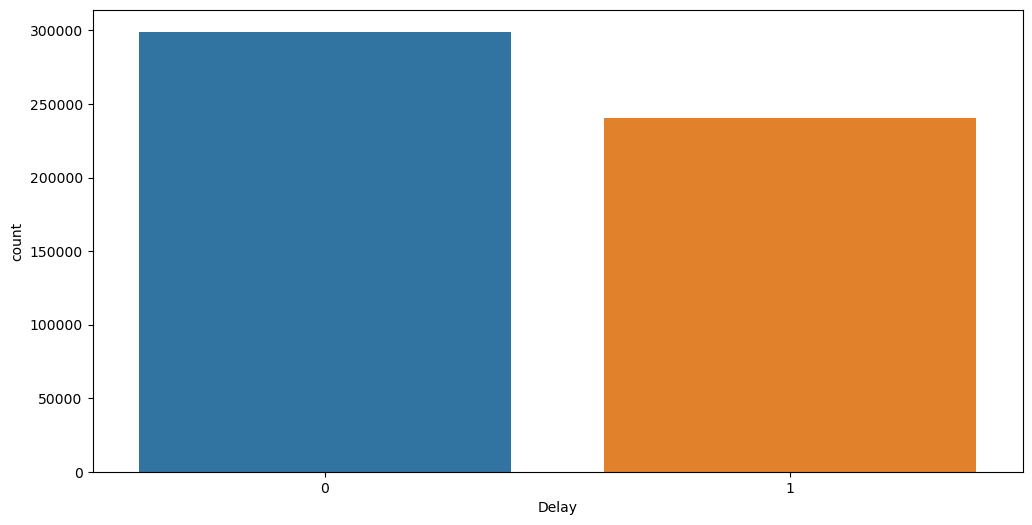

In [67]:
# counts no:of flight delays positive and negative(blue=negative,orange=positive)
plt.figure(figsize = (12,6))
sns.countplot(x = 'Delay', data = data)
plt.show()

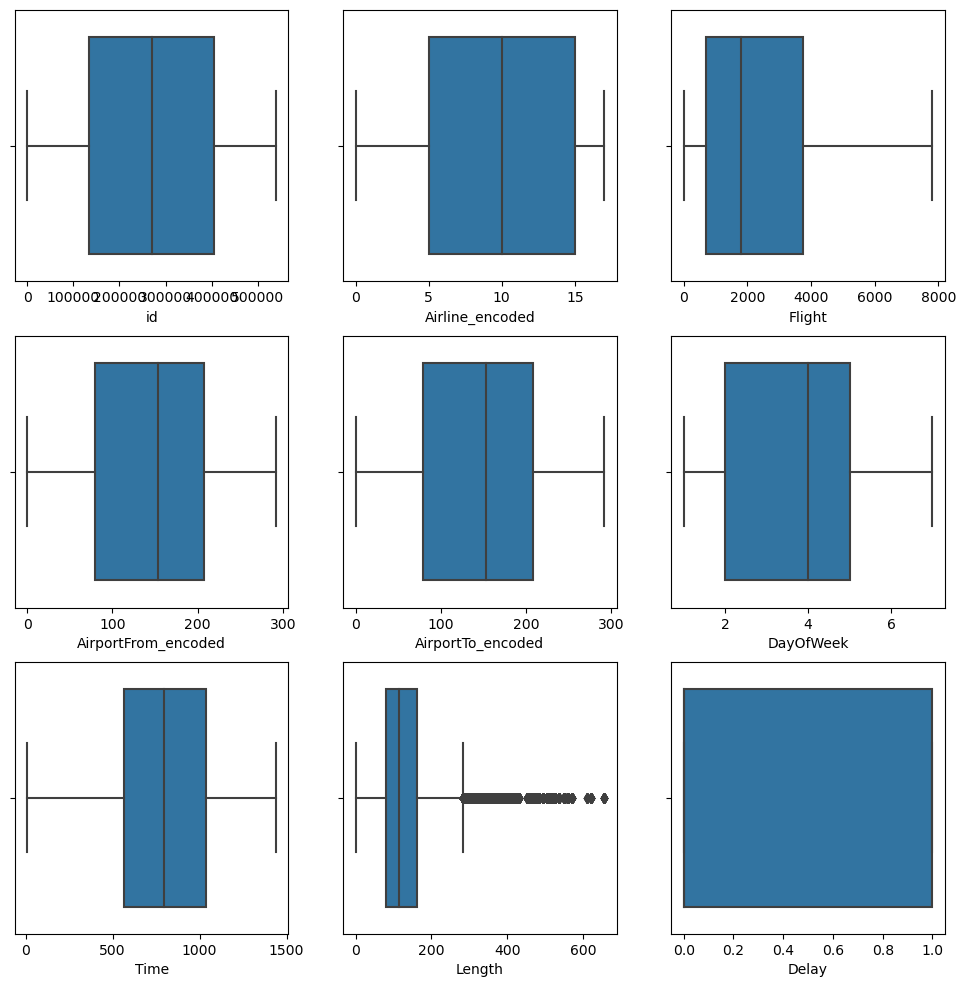

In [68]:
# subplot and boxplot are used to identify the outliers
plt.figure(figsize = (12,12))
for i, col in enumerate(['id','Airline_encoded','Flight','AirportFrom_encoded','AirportTo_encoded','DayOfWeek','Time','Length','Delay']):
        plt.subplot(3,3,i+1)
        sns.boxplot(x = col, data = data)
plt.show()

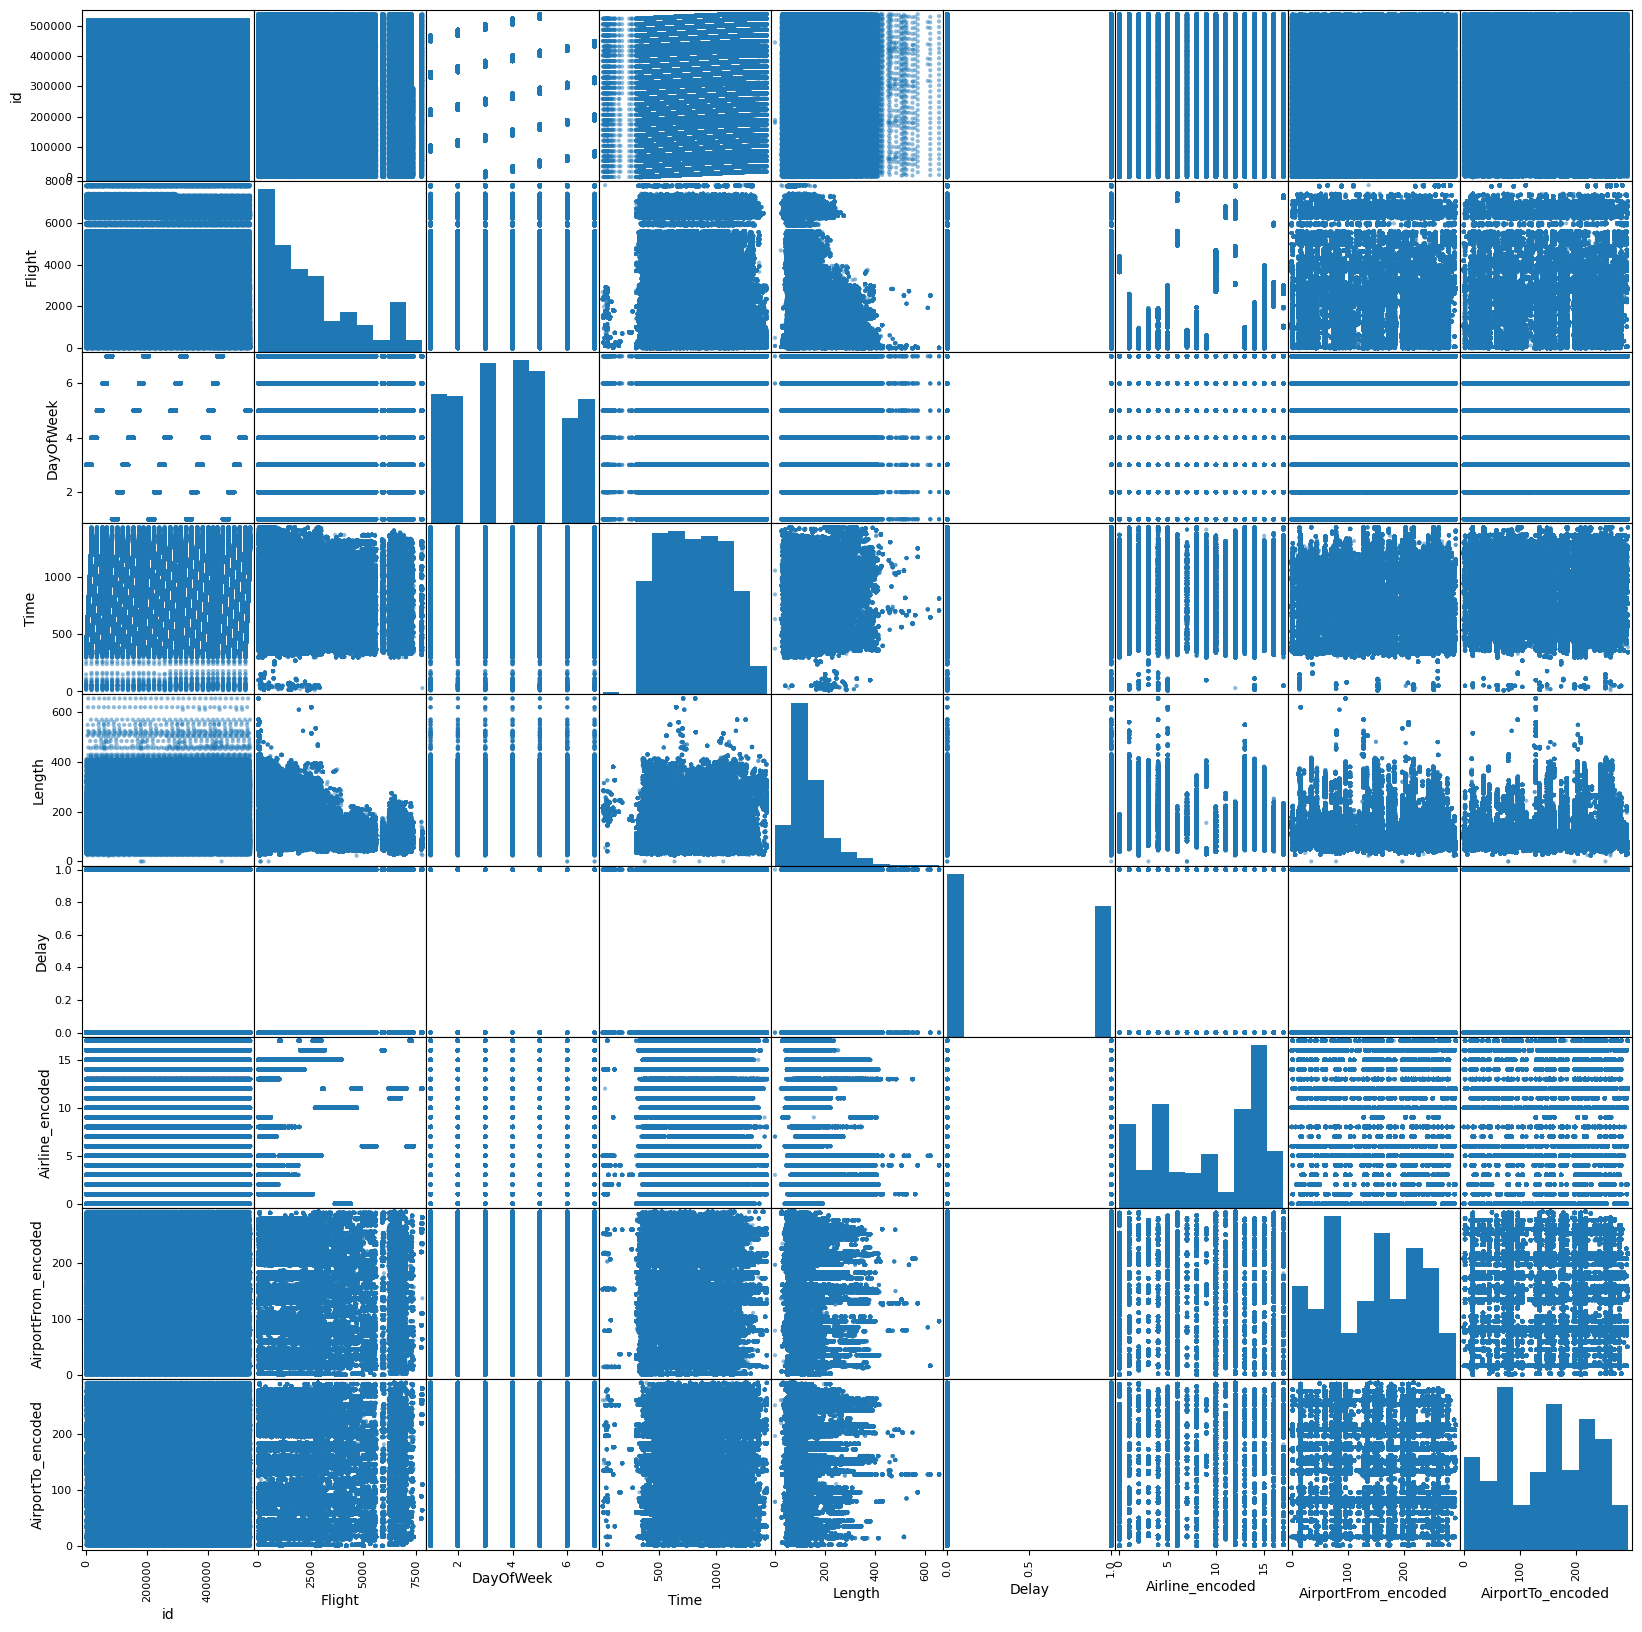

In [69]:
# Scatter plot describes values of 2 variables along the 2 axis
%matplotlib inline
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20));
plt.show()

In [ ]:
# pairplot is to create scatter plots between all variables
sns.pairplot(data, hue='Delay',data=data)
plt.show()

In [ ]:
# histograms dusplay numeric data i.e wheter the data is normally distributed or skewed
plt.figure(figsize=(6,6))
for i, col in enumerate(['id','Airline_encoded','Flight','AirportFrom_encoded','AirportTo_encoded','DayOfWeek','Time','Length','Delay']):
        plt.subplot(3,3,i+1)
        sns.histplot(x = col, data = data)
plt.show()

In [ ]:
# heatmap is used to describe correlation between variables
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),vmin=-1.0,center=0,cmap='RdBu_r',annot=True,data=data)
plt.show()

## Splitting data into x and y

In [27]:
target_name='Delay'
# seperate delay from dataset
y=data[target_name]
# seperate dependent(input features) from dataset
x=sel.drop(target_name,axis=1)

In [28]:
x.head()

,id,Airline_encoded,Flight,AirportFrom_encoded,AirportTo_encoded,DayOfWeek,Time,Length
0,1,4,269,253,135,3,15,205
1,2,14,1558,217,60,3,15,222
2,3,1,2400,154,80,3,20,165
3,4,1,2466,253,80,3,20,195
4,5,2,108,14,252,3,30,202


In [29]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Delay, dtype: int64

## Feature Engineering

In [30]:
# standardscaler standardizes the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
SSX = scaler.transform(x)

In [31]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(SSX,y,test_size=0.2,random_state=7)

In [32]:
X_test.shape,y_test.shape

((107877, 8), (107877,))

## model training

### logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

### knn

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

### decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### naive bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

### random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

# making prediction

### using logistic regression

In [38]:
X_test.shape

(107877, 8)

In [39]:
# prection on test dataset
lr_pred=lr.predict(X_test)

In [40]:
lr_pred.shape

(107877,)

### using knn

In [41]:
#  prediction on testdata
knn_pred=knn.predict(X_test)

C:\Users\niran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
knn_pred.shape

(107877,)

### using decision tree

In [43]:
dt_pred=dt.predict(X_test)

### using naive bayes

In [44]:
nb_pred=nb.predict(X_test)

### using random forest

In [45]:
rf_pred=rf.predict(X_test)

# train and test score

In [46]:
# using logistic regression
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regreesion",lr.score(X_train,y_train)*100)
print("Accuracy (Test) score of Logistic Regression",lr.score(X_test,y_test)*100)
print("Accuracy (Test) score of Logistic Regression",accuracy_score(y_test,lr_pred)*100)

Train Accuracy of Logistic Regreesion 60.153508873573024
Accuracy (Test) score of Logistic Regression 60.244537760597716
Accuracy (Test) score of Logistic Regression 60.244537760597716


In [47]:
#  using KNN
print("Train Accuracy of KNN",knn.score(X_train,y_train)*100)
print("Accuracy (Test) score of KNN",knn.score(X_test,y_test)*100)
print("Accuracy (Test) score of KNN",accuracy_score(y_test,knn_pred)*100)

C:\Users\niran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Accuracy of KNN 76.69812238995519


C:\Users\niran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy (Test) score of KNN 64.09336559229493
Accuracy (Test) score of KNN 64.09336559229493


In [48]:
#  using Decision Tree
print("Train Accuracy of Decision Tree",knn.score(X_train,y_train)*100)
print("Accuracy (Test) score of Decision Tree",dt.score(X_test,y_test)*100)
print("Accuracy (Test) score of Decision Tree",accuracy_score(y_test,dt_pred)*100)

C:\Users\niran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Accuracy of Decision Tree 76.69812238995519
Accuracy (Test) score of Decision Tree 62.22827850236844
Accuracy (Test) score of Decision Tree 62.22827850236844


In [49]:
# using Naive Bayes Clasifier
print("Train Accuracy of Naive Bayes",nb.score(X_train,y_train)*100)
print("Accuracy (Test) score of Naive Bayes",nb.score(X_test,y_test)*100)
print("Accuracy (Test) score of Naive Bayes",accuracy_score(y_test,nb_pred)*100)

Train Accuracy of Naive Bayes 60.49811590105352
Accuracy (Test) score of Naive Bayes 60.46608637615062
Accuracy (Test) score of Naive Bayes 60.46608637615062


In [50]:
# using Random Forest
print("Train Accuracy of Random Forest",rf.score(X_train,y_train)*100)
print("Accuracy (Test) score of Random Forest",rf.score(X_test,y_test)*100)
print("Accuracy (Test) score ofRandom Forest",accuracy_score(y_test,rf_pred)*100)

Train Accuracy of Random Forest 99.99930476053636
Accuracy (Test) score of Random Forest 69.01841912548551
Accuracy (Test) score ofRandom Forest 69.01841912548551


### confusion matrix

In [51]:
# confusion matrix is used to compare predicted values with actual values
from sklearn.metrics import classification_report,confusion_matrix


In [52]:
# for Logistic Regression
cm=confusion_matrix(y_test,lr_pred)
cm

array([[45236, 14548],
       [28339, 19754]], dtype=int64)

<AxesSubplot:>

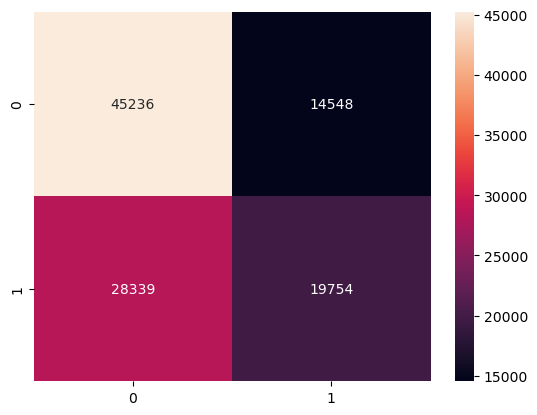

In [53]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='d')

In [54]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [55]:
TN,FP,FN,TP

(45236, 14548, 28339, 19754)

In [56]:
# confusion matrix for Logistic Regresion
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,lr_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))



TN-True Negative 45236
FP-False Positive 14548
FN-False Negative 28339
TP-True Positive 19754
Accuracy Rate: 60.244537760597716
Misclassification Rate: 39.755462239402284


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.61      0.76      0.68     59784
           1       0.58      0.41      0.48     48093

    accuracy                           0.60    107877
   macro avg       0.60      0.58      0.58    107877
weighted avg       0.60      0.60      0.59    107877



In [58]:
#confusion matrix for KNN
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,knn_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


TN-True Negative 42139
FP-False Positive 17645
FN-False Negative 21090
TP-True Positive 27003
Accuracy Rate: 64.09336559229493
Misclassification Rate: 35.90663440770507


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69     59784
           1       0.60      0.56      0.58     48093

    accuracy                           0.64    107877
   macro avg       0.64      0.63      0.63    107877
weighted avg       0.64      0.64      0.64    107877



In [60]:
# confusion matrix for decision tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,dt_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


TN-True Negative 39154
FP-False Positive 20630
FN-False Negative 20117
TP-True Positive 27976
Accuracy Rate: 62.22827850236844
Misclassification Rate: 37.77172149763156


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66     59784
           1       0.58      0.58      0.58     48093

    accuracy                           0.62    107877
   macro avg       0.62      0.62      0.62    107877
weighted avg       0.62      0.62      0.62    107877



In [62]:
# confusion matrix for Naive Bayes
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,nb_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


TN-True Negative 44421
FP-False Positive 15363
FN-False Negative 27285
TP-True Positive 20808
Accuracy Rate: 60.46608637615062
Misclassification Rate: 39.53391362384938


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68     59784
           1       0.58      0.43      0.49     48093

    accuracy                           0.60    107877
   macro avg       0.60      0.59      0.58    107877
weighted avg       0.60      0.60      0.59    107877



In [64]:
# confusion matrix for Random Forest
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix(y_test,rf_pred)
print("TN-True Negative {}".format(cm[0,0]))
print("FP-False Positive {}".format(cm[0,1]))
print("FN-False Negative {}".format(cm[1,0]))
print("TP-True Positive {}".format(cm[1,1]))
print("Accuracy Rate: {}".format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print("Misclassification Rate: {}".format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))


TN-True Negative 45813
FP-False Positive 13971
FN-False Negative 19451
TP-True Positive 28642
Accuracy Rate: 69.01841912548551
Misclassification Rate: 30.981580874514492


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73     59784
           1       0.67      0.60      0.63     48093

    accuracy                           0.69    107877
   macro avg       0.69      0.68      0.68    107877
weighted avg       0.69      0.69      0.69    107877

